# House Price Data Visualization

## List of Levels

1. [Story Line](#1)<br>
2. [Package Import](#2)<br>
3. [Data Wrangling](#3)<br>
    - [Gather](#3.1)<br>
    - [Assess](#3.2)<br>
    - [Clean](#3.3)<br>
4. [Exploratory Data Analysis](#4)<br>
    - [Univariate Exploration](#4.1)<br>
    - [Bivariate Exploration](#4.2)<br>
    - [Multivariate Exploration](#4.3)<br>
5. [Conclusion](#5)<br>

<a id=1></a>
## 1. Story Line


   >For Every Person in the world, There are three main things which are the basic need for a human, they are:
   
   1. **Food**
   2. **Cloth**
   3. **Home**
       
   One can obtain **Food and clothes** with a low or easily offerdable price by doing a small or daily wages, But when coming in to **Home**, it is a big dream for many people. 
   
  Nowadays, It is really hard for anyone to easily buy a home, because the home price is huge based on some key criteria which will decide the house price. One needs to deeply understand the key parameters before looking for a new home based on his budget and requirements .
  
  One of the parameter which everyone consider is the neighborhood. So with all this in mind, we will interpret with the parameters in the below data set to find best criteria to fina a best house. 

 
 #### About Data:
 
  > The below datasets contains the below parameters to get the home price:
  
  - **house_id**: This columns has discrete values of house id.
  - **neighborhood**: This column has Ordinal values of neigbhborhood list which places a key role in deciding the price.
  - **area**: This columns has continous value of area size for the house in sq.meters
  - **bedrooms**: This column has discrete values of number of bedrooms.
  - **bathrooms**: This column has discrete values of number of bathrooms.
  - **style**: This column has  Ordinal value of the house type/style which is also ket parameter for price.
  - **price**: This is answer column for all other columns, it has continous values of house price in dollars.
  
  With all these information let's work on the below data and will get the house price.


<a id=2></a>
## 2. Package Import

In [1]:
# All Required libraries will be imported  here
import pandas as pd            
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Magic Function to display the charts in the notebook  
%matplotlib inline          
sns.set_style("whitegrid")     #To set the whitegrid background for all 

<a id=3></a>
## 3. Data Wrangling

<A id=3.1></a>
### Gather
Let's load the data and view the sample rows

In [2]:
data = pd.read_csv('house_prices.csv')
data.sample(10) # This will give 10 random sample rows from the data

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
1327,2665,B,32,1,0,lodge,28079
338,1637,C,1722,4,2,ranch,439611
4988,5820,B,2155,4,2,victorian,1075106
1908,6226,B,1100,2,1,lodge,554755
1166,6527,C,1968,4,2,victorian,500619
5975,2645,A,3071,5,3,ranch,774315
370,6284,B,3583,5,3,victorian,1779262
421,3960,B,3422,5,3,victorian,1699889
50,752,A,3131,5,3,victorian,789195
192,3913,C,1390,2,1,lodge,357039


<a id=3.2></a>
### Assess

Now Let's begin check our data for any errors that errros/issues which needs to be fixed prior to analye the house price

In [3]:
data.shape

(6028, 7)

Our Dataset has 6028 rows and 7 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
house_id        6028 non-null int64
neighborhood    6028 non-null object
area            6028 non-null int64
bedrooms        6028 non-null int64
bathrooms       6028 non-null int64
style           6028 non-null object
price           6028 non-null int64
dtypes: int64(5), object(2)
memory usage: 329.7+ KB


From the above the output we can see that we have no null values in any of the rows and we have **5 qualitative variables and 2 Quantitative variables**

In [5]:
data.describe()

,house_id,area,bedrooms,bathrooms,price
count,6028.000000,6028.000000,6028.000000,6028.000000,6.028000e+03
mean,4110.536828,2136.849038,3.717651,2.158261,7.542079e+05
std,2251.834665,1237.481101,1.704650,1.169621,5.236731e+05
min,200.000000,0.000000,0.000000,0.000000,1.216700e+04
25%,2167.500000,1225.000000,3.000000,2.000000,3.641350e+05
50%,4120.500000,1826.000000,4.000000,2.000000,6.357590e+05
75%,6070.250000,3129.000000,5.000000,3.000000,9.666752e+05
max,7999.000000,7447.000000,8.000000,5.000000,3.684602e+06


From the above description we can see that there is some outliers in the area column, where we can see that there is a huge difference between 3rd and 4th quartile. Let's see max 10 rows

In [6]:
data.loc[data.area.nlargest(10).index] # To get the top 10 list of house with large area

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
2852,6438,B,7447,8,5,victorian,3684602
3626,3679,A,7322,8,5,victorian,1828951
5982,5506,B,7142,8,5,victorian,3534237
5828,5865,B,6992,8,5,victorian,3460287
2211,2430,B,6922,8,5,victorian,3425777
5080,4715,A,6713,8,5,victorian,1677919
4686,2699,A,6621,8,5,victorian,1655103
2404,1118,A,6560,7,4,victorian,1639823
3298,7240,A,6490,8,5,victorian,1622615
303,5237,C,6480,8,5,victorian,1620135


So, from above we understand that the house is victorian style which is expected ,we cannot drop these values, Let's continue..

In [7]:
data.isnull().values.any()

False

In [8]:
data.duplicated().values.any()

False

The above two output says that there is no null and duplicate rows in the data set. which means it look like clean data. Let's continue further..

In [9]:
data.nunique() # This will give the number of unique rows for all the columns

house_id        6028
neighborhood       3
area            3118
bedrooms           9
bathrooms          6
style              3
price           4762
dtype: int64

The above data proves that `houseid` is unique for all rows which will not help us in our analysis so we can **drop** this column.

Now we can see there are 3 different values for `neighbothood` and `style` column. Let's see what are the values in the below command

In [10]:
data['style'].unique(), data['neighborhood'].unique()

(array(['ranch', 'victorian', 'lodge'], dtype=object),
 array(['B', 'A', 'C'], dtype=object))

Now with the above the let's create **Ordered** type object using python function

It is a best practice to create a copy of the dataset before we make any changes inorder to compare or recover it.

In [11]:
data_org = data.copy()

<a id=3.3></a>
### Clean

Now Let's clean the known issues in the data set

In [12]:
# As identified in Assess Phase, Noe we'll delete the house_id Column
data.drop(columns='house_id',inplace=True)

In [13]:
# This Loop conerts the object typr coulmns to category ordered column
for order in ['neighborhood','style']:
    data[order]=data[order].astype('category')
data.dtypes

neighborhood    category
area               int64
bedrooms           int64
bathrooms          int64
style           category
price              int64
dtype: object

Now we have converted our quantitative variables to categeroical type

In [14]:
data.head()

,neighborhood,area,bedrooms,bathrooms,style,price
0,B,1188,3,2,ranch,598291
1,B,3512,5,3,victorian,1744259
2,B,1134,3,2,ranch,571669
3,A,1940,4,2,ranch,493675
4,B,2208,6,4,victorian,1101539


So with all the above data let's start our Exploratory Data Analysis...

<a id=4></a>
## 4. Exploratory Data Analysis

Now, we will try to analyse the data to get the price of the house by interpreting other parameters. Aslo after each observation we make sure that all the plots were polished

<a id=4.1></a>
#### Univariate Exploration

In [15]:
area_mean = data.area.mean()
area_mean

2136.8490378234906

We got the average area from the datset, based on the describe data we know that there are some outliers in area columns.

Text(0.5, 0, 'Area of House')

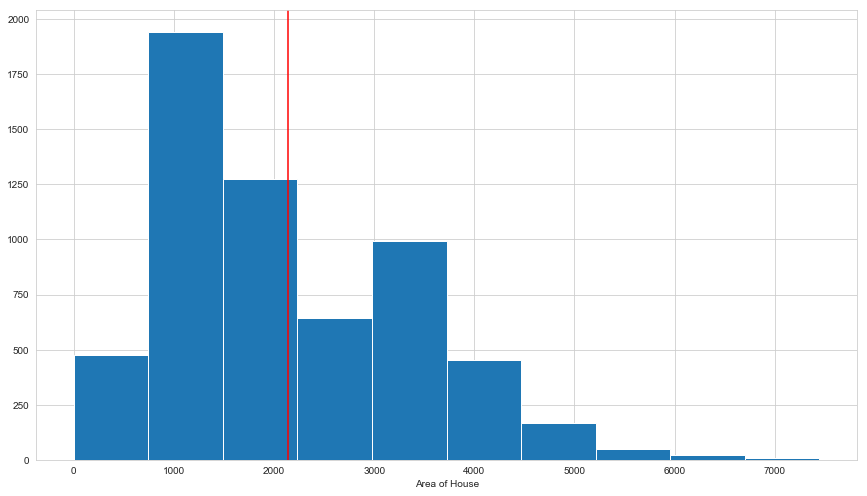

In [16]:
plt.figure(figsize=[14.70, 8.27])
plt.hist(data['area']);
plt.axvline(area_mean, color = 'r')
plt.xlabel("Area of House")

From the above plot, I can see that data is right skewed and the mean is at between 2136 sq.meters. Also we can that there more house in the range of 1000 to 2000 sq.meters. Let's to try **zoom in the data till 5000 sq.meters**. where most of the data fit's in.

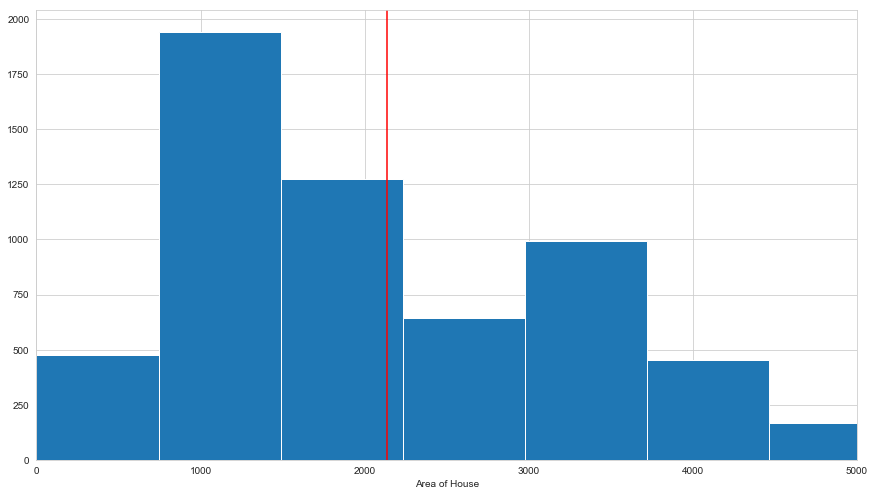

In [17]:
plt.figure(figsize=[14.70, 8.27])
plt.hist(data['area'])
plt.axvline(area_mean, color = 'r')
plt.xlabel("Area of House")
plt.xlim(0,5000);  # This Trims the x axis to zoom in to the data spread

Now Let's plot the data with **Mean and Probabilty** density of area

So what is the of the **shape** of area columns, is there any skewness in the data?

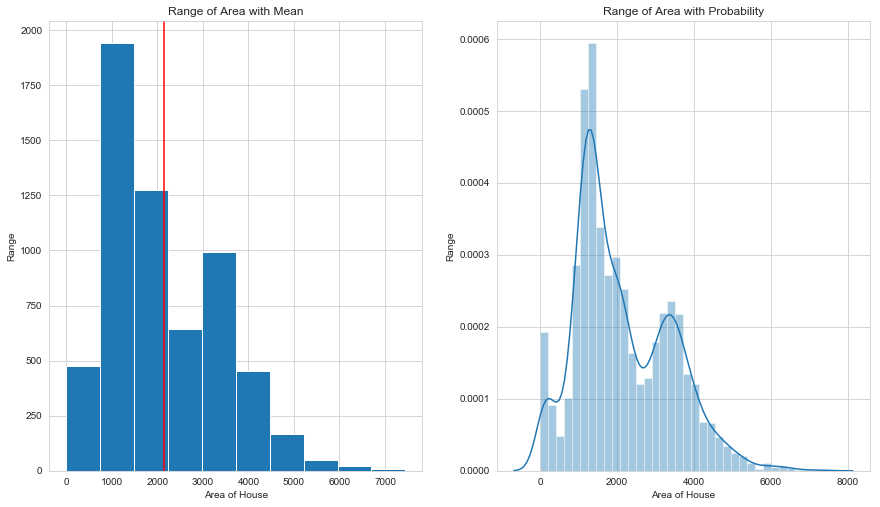

In [18]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1,2,1)
plt.hist(data['area']);
plt.axvline(area_mean, color = 'r')  #This plots a line in the mean area
plt.xlabel("Area of House")
plt.ylabel("Range")
plt.title("Range of Area with Mean")

plt.subplot(1,2,2)
sns.distplot(data['area'])
plt.xlabel("Area of House")
plt.ylabel("Range")
plt.title("Range of Area with Probability");

From the above plot, We can see that data is right skewed and the mean is at between 2136 sq.meters. Also we see can that there more house in the range of 1000 to 2000 sq.meters and the second chart shows the probability of the area.

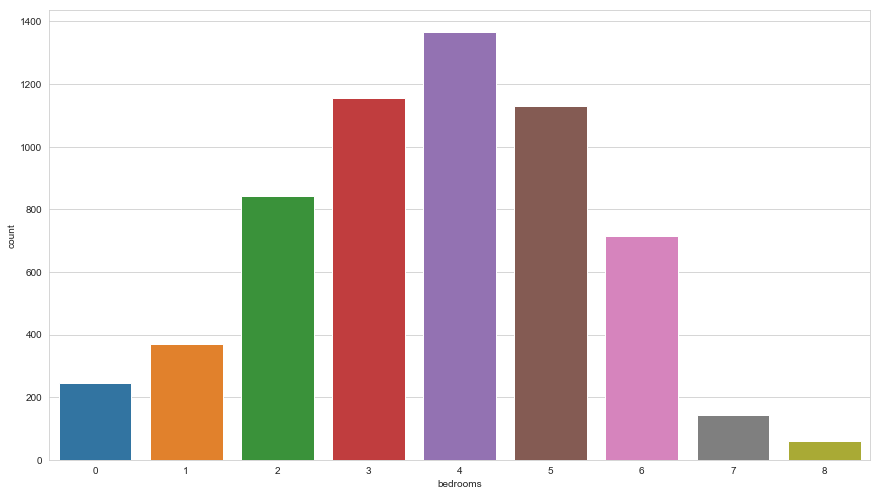

In [19]:
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data['bedrooms']);

**Note** For Lodge style houses we have 0 bedrooms and 0 bathrooms

Though we can the see the maximum bedroom house, but still it not easy to identify which is low and high, now let's sort the values and plot it againa

Let us find the Total count of Houses based on the total bedrooms values.

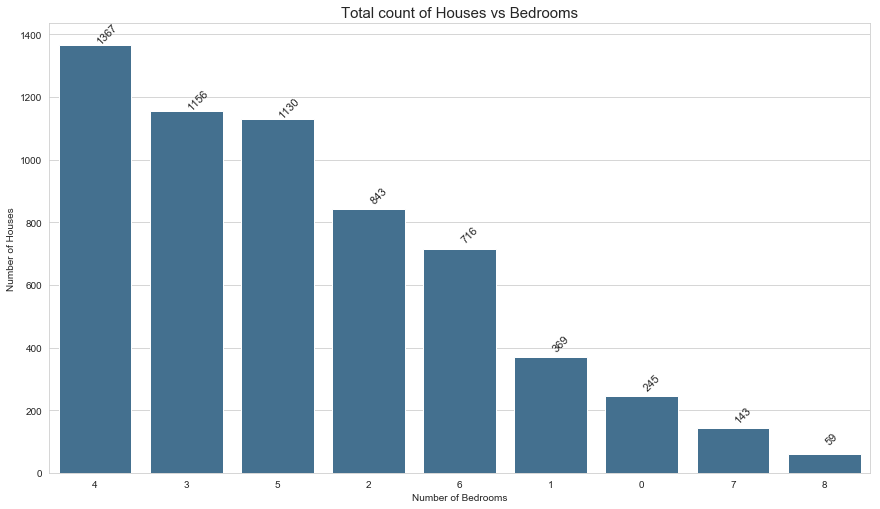

In [20]:
plt.figure(figsize=[14.70, 8.27])
default_color = sns.color_palette()[0]
# The below code used to plot the total count of each bedrooms in descending order
ax = sns.countplot(data['bedrooms'],order=data['bedrooms'].value_counts().index, color=default_color, saturation=0.5);
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Houses")
plt.title("Total count of Houses vs Bedrooms", size=15);
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+ 0.4, i.get_height()+50, \
            str(round((i.get_height()))), fontsize=11,
                rotation=45) #This Code annotates the values on top of each bar for clear understanding.

The above chart gives a clear difference and it is easy to distinguish between max and min bedroomed houses. So we have **1367** house with 4 bedrooms and **59** houses with 8 bedrooms in our data. Also we can see there **245** houses with 0 bedrooms, which are Lodge styles houses

Now, we want to know what propotion of the houses are there are in style and neighborhood parameters.

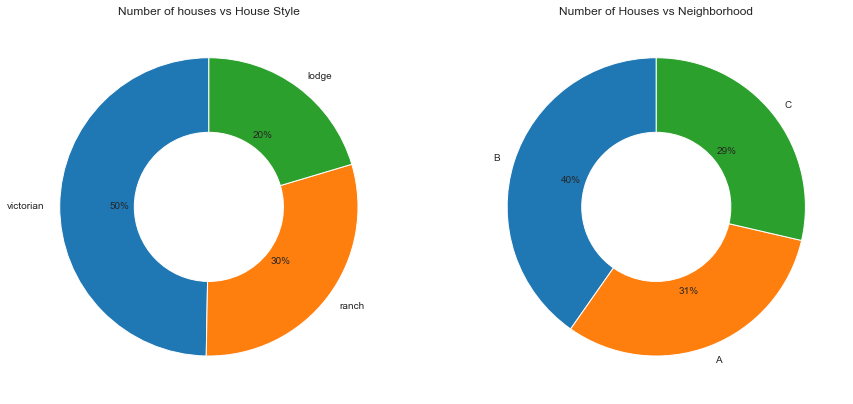

In [21]:
plt.figure(figsize=[14.70, 8.27])
#Pie chart for Number of Houses based on House Style
plt.subplot(1,2,1)
style = data['style'].value_counts().reset_index()

# The below code witll plot a pie chart with respective labels and it's propotion in the data
plt.pie(style['style'], wedgeprops=dict(width=0.5),labels=style['index'],autopct='%1.0f%%',startangle=90);
plt.title("Number of houses vs House Style");

#Pie chart for Number of Houses based on Neighborhood
plt.subplot(1,2,2)
neighbor = data['neighborhood'].value_counts().reset_index()

# The below code witll plot a pie chart with respective labels and it's propotion in the data
plt.pie(neighbor['neighborhood'], wedgeprops=dict(width=0.5),labels=neighbor['index'],
            autopct='%1.0f%%',startangle=90, counterclock=True);
plt.title("Number of Houses vs Neighborhood");

The above two Pie(Donut) Charts shows the proportion of houses based on `Style` and `Neighborhood` columns. It shows there are many houses with `victorian` style and Many Hosues with `B` as Neighborhood in the data set.

<a id=4.2></a>
#### Bivariate Exploration

Is there any difference between style and neighborhood

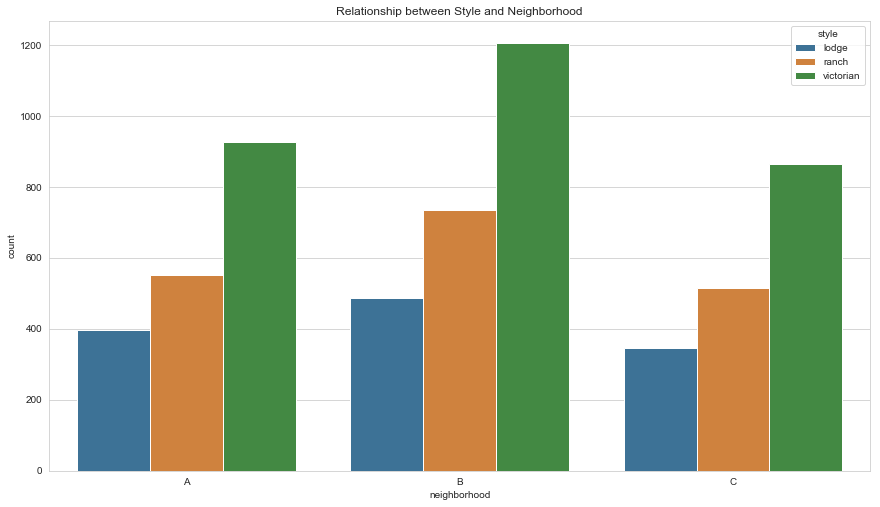

In [22]:
plt.figure(figsize=[14.70, 8.27])
sns.countplot(x = 'neighborhood', hue = 'style', data=data, saturation=0.6)
plt.title("Relationship between Style and Neighborhood");

This **Clustered Bar** charts shows relation between `neighborhood` and `style` parameter. By Comparing the both `style` and `neighborhood` parameters, We see that all Neigborhood has different styles of houses. which proves that `Victorian` style houses are more in `B` neighborhoood which we observered  as seprately in previous pie chart. 

What is relation of `area` with `style` and `neighborhood` parameters

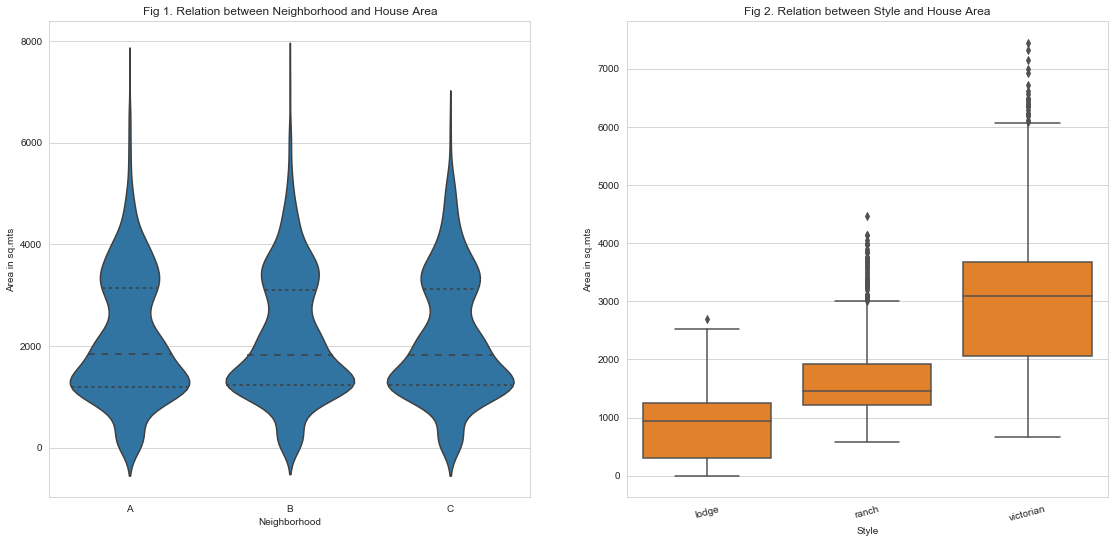

In [23]:
plt.figure(figsize=[14.70, 8.27])
#Violin chart to get relation between Neighborhood and House Area
plt.subplot(1,2,1)
colors = sns.color_palette()[0]
#The below code will plot the violin chart with quartile lines
sns.violinplot(x='neighborhood',y='area',data=data, inner = 'quartile', color=colors);
plt.title("Fig 1. Relation between Neighborhood and House Area")
plt.xlabel("Neighborhood")
plt.ylabel("Area in sq.mts");

plt.subplot(1,2,2)
colors = sns.color_palette()[1]
#The below code will plot the boxplot chart for stryle and area columns
sns.boxplot(x='style',y='area',data=data,  color=colors);
plt.title("Fig 2. Relation between Style and House Area")
plt.xlabel("Style")
plt.ylabel("Area in sq.mts");
plt.xticks(rotation=15)
plt.subplots_adjust(bottom=0.1, left = 0, right=1, top=0.9);

**Fig 1:**
This **Violin Chart** provides the relationship between category and numeric values. By which we can observe that the mean area of all Neighborhood as are in same location and as well min, first & third quartile. only the maximum value differs due to the outlier values of victorian style homes.

**Fig 2:**
This **Box plot** provides the relation between Style and House Area. We can see a many outlier points above the max whisker of victorian box. we can observe there are outlier values for eacy style houses which decidec the price of the house

what is the count of bedrooms for each style houses

C:\Users\rk000u\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1058.4x595.44 with 0 Axes>

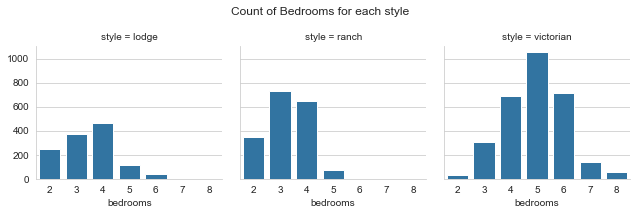

In [24]:
plt.figure(figsize=[14.70, 8.27])
#plt.figure(figsize=[14.70, 8.27])
graph = sns.FacetGrid(data=data, col='style')
graph.map(sns.countplot,'bedrooms');
plt.subplots_adjust(top=0.8)
graph.fig.suptitle('Count of Bedrooms for each style');


From this **Facet Grid bar chart** we can observer that `lodge` houses has max 6 bedrooms, where `ranch` houses has till 5 bedrooms and `victorian` houses has 8 bedrooms in the dataset

<a id=4.3></a>
#### Multivariate Exploration

Is there any relation between bathrooms and area over style and neighborhood

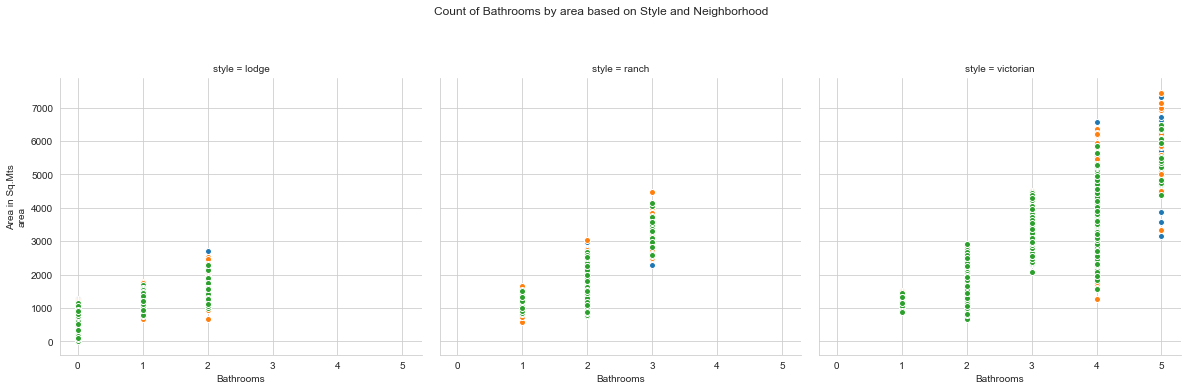

In [25]:
#plt.figure(figsize=[14.70, 8.27])
#The Regular plt.figure() doesn't worked for facet plot so is have 
#height and aspect to make the chart to a better view


#This will create a scatter plots on all the values of style, neighborhoodm bathrooms & Area
graph = sns.FacetGrid(data=data, col='style', hue='neighborhood',height = 5.50, aspect = 1);
graph.map(plt.scatter,'bathrooms','area',edgecolor ='w');
plt.subplots_adjust(top=0.8);
graph.fig.suptitle('Count of Bathrooms by area based on Style and Neighborhood');
graph.axes[0,0].set_xlabel('Bathrooms'); #Xlabels for each plot
graph.axes[0,1].set_xlabel('Bathrooms');
graph.axes[0,2].set_xlabel('Bathrooms');
# overall ylabel
graph.fig.text(x=0, y=0.5, 
           verticalalignment='center',
           s='Area in Sq.Mts',
           rotation=90); #vertical text

This **Facet Scatter plot** shows that `lodge` style home has max 2 bathrooms and victorian houses has 5 bathrooms and the high area house are in B neighborhood on victorian style houses

Can we plot the correlation between all the quantative variables

<Figure size 1058.4x595.44 with 0 Axes>

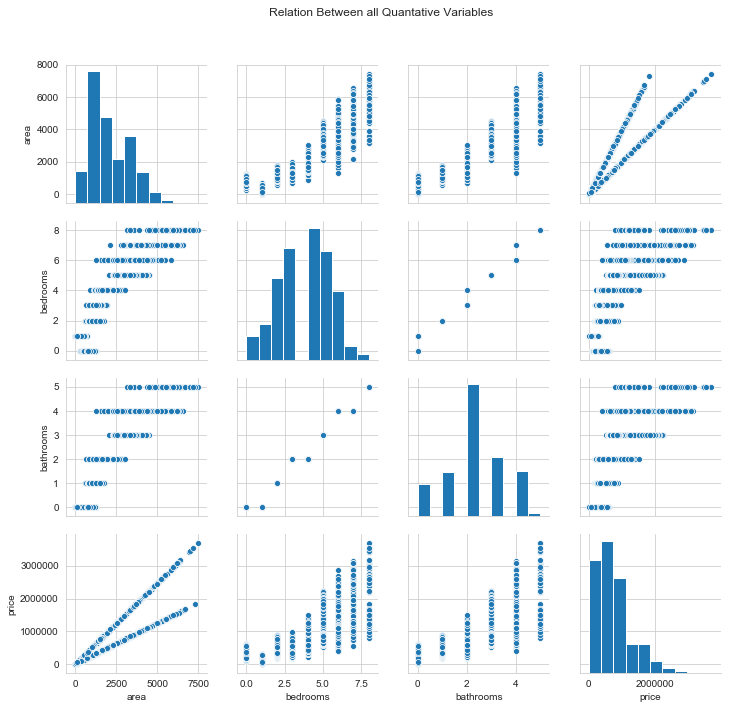

In [26]:
plt.figure(figsize=[14.70, 8.27])
graph = sns.pairplot(data)
plt.subplots_adjust(top=0.9)
graph.fig.suptitle('Relation Between all Quantative Variables');

This **Pair Plot** shows the relation between all the quantative varaibales

In [27]:
style_neighbor = data.groupby(['style','neighborhood']).size().reset_index(name='count')
style_neighbor = style_neighbor.pivot(index = 'style', columns = 'neighborhood', values='count')
style_neighbor

neighborhood,A,B,C
style,,,
lodge,397,486,346
ranch,553,734,515
victorian,926,1207,864


So which style and neighborhood has More and Less  houses

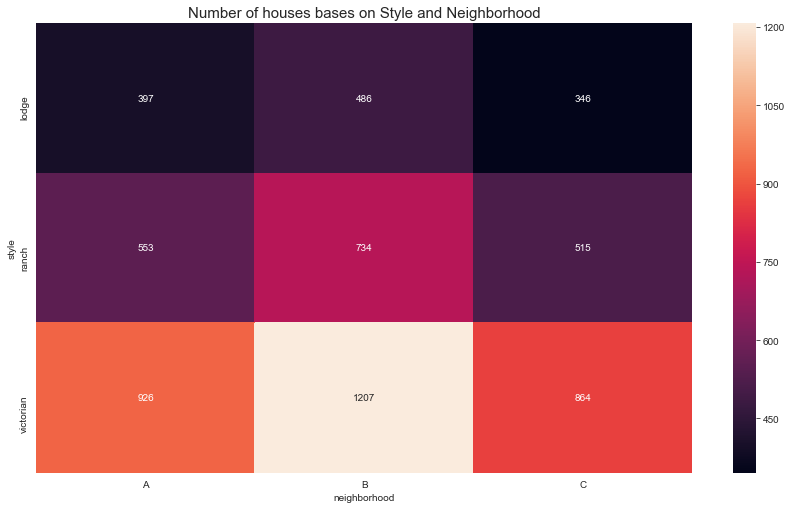

In [28]:
#Here is the heatmap for all unique column values in style and neighborhood columns
plt.figure(figsize=[14.70, 8.27])
ax = plt.axes()
graph = sns.heatmap(style_neighbor, annot=True, fmt='d' ,ax = ax)
ax.set_title('Number of houses bases on Style and Neighborhood', size =15);

This **Heat Map** provides the correlation between  `style` and `neighborhood` parameters. By which we can see that `Neighborhood B` and `Victorian Style` are more with **1207** house and `Neighborhood C` and `Lodge Style` are less with **346** houses 

Is there any errors with the price having neighborhood and style parameters. 

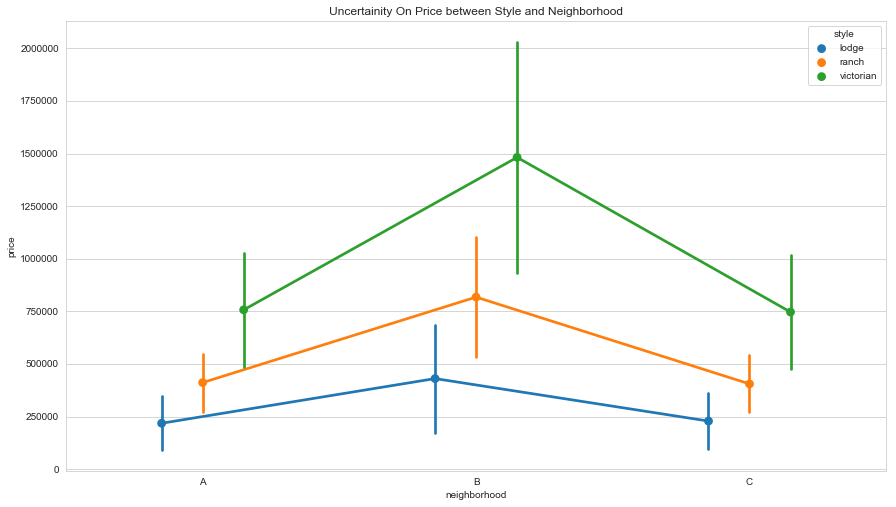

In [29]:
#The Below pointplot gives uncrtainity in the at std deviation between price, style & Neighborhood
plt.figure(figsize=[14.70, 8.27])
ax = plt.axes()
graph = sns.pointplot(data=data, x='neighborhood', y='price', hue='style',dodge = 0.3, ci ='sd', ax=ax)
ax.set_title('Uncertainity On Price between Style and Neighborhood');

This **Point plot** provides the central tendancy uncertainty of the standard deviation error between style and neighborhood based on price parameter.

<a id=5></a>
## 5.Conclusion

> After interpreting with all the parameters in the given data set, we observed the below key points

- There is a skewness in the area column due to the large area of victorian houses, in which it indicates these houses are built for luxury and expensive.
- We observed there are **1367** house with 4 bedrooms and **59** houses with 8 bedroomed houses in our data. Also we can see there **245** houses with 0 bedrooms, which are Lodge styles houses 
- By the proportion of `Style` and `Neighborhood` columns, There are many houses with `victorian` style and Many Hosues with `B` as Neighborhood in the data set.
- By Comparing the both `style` and `neighbirhood` parameters, We see that all  Neigborhood has different styles of houses
- We found that the mean area of all `Neighborhood` as are in same location and as well min, first & third quartile valuse only the maximum value differs due to the outlier values of victorian style homes between `Neighborhood` and `area`
- With `Style` and House `Area`. We can see a many outlier points above the max whisker of victorian box. we can observe there are outlier values for eacy style houses which decidec the price of the house
- By getting the number houses based on the bedrooms for each style, We observed that lodge houses has max 6 bedrooms, where ranch houses has till 5 bedrooms and victorian houses has 8 bedrooms in the dataset.
- From **Facet Scatter Plot** between `bedrooms`,`area`,`style`and `neighborhood` we came to know that lodge style home has max 2 bathrooms and victorian houses has 5 bathrooms and the high area house are in B neighbor in victorian style houses
- From **Pair Plot** it clearly shows that we have linear relation between `bathrooms` and `bedrooms` and between `area` and `price`
- From **Heat Map** between  `style` and `neighborhood` parameters. We can see that `Neighbourbood B` and `Victorian Style` are more with **1207** house and `Neighborhood C` and `Lodge Style` are less with **346** houses.
- And Finally from  **Point plot** We got the central tendancy uncertainty of the standard deviation error between `style` and `neighborhood` based on `price` parameter.